<a href="https://colab.research.google.com/github/VictorFrancheto/Regularizacao_de_Dados/blob/main/Simulac%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Victor Hugo F. Francheto

**RA:** 9234460


#### Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
from scipy.optimize import root_scalar

#### Parâmetros do modelo

In [11]:
# Parâmetros do modelo
N = 10**4  # Número de simulações
n = 1000   # Tamanho da amostra
lambda0 = 2  # Valor verdadeiro de lambda

#### Simulação de Monte Carlo

# Estimativa de Parâmetros e Distribuições

## 1. Estimadores

Seja $ X_1, X_2, \ldots, X_n $ uma amostra aleatória de uma variável aleatória $ X\sim Exp(\lambda)$ que segue uma distribuição exponencial com parâmetro $ \lambda $ (ou $ \lambda = 1/\theta $), onde $ \theta > 0 $.

### 1.1. Estimador Não Viesado

Definimos a função $ U_n(\lambda) $ para encontrar um estimador não viesado:
$$
U_n(\lambda) = \frac{1}{n} \sum_{i=1}^{n} X_i - \frac{1}{\lambda}
$$

## 3. Estatística Z

O cálculo da estatística $ Z_0 $ é feito da seguinte maneira:
$$
Z_0 = \sqrt{n} \frac{\hat{\lambda} - \lambda_0}{\sqrt{V(\lambda_0)}}
$$
onde $ \hat{\lambda} $ é o estimador calculado e $ \lambda_0 $ é o verdadeiro parâmetro.

## 4. Transformação de Parâmetros

Para a transformação do parâmetro, consideramos a função $ g(\lambda) = \frac{1}{\lambda} $. A derivada de $ g $ é:
$$
g'(\lambda) = -\frac{1}{\lambda^2}
$$
A nova variância associada à transformação é dada por:
$$
V_1(\lambda) = V(\lambda) (g'(\lambda))^2
$$

em que $$
V(\lambda) = \frac{\Lambda(\lambda)}{I(\lambda)^2} = \frac{1/\lambda^2}{(1/\lambda^2)^2} = \lambda^2
$$

O novo cálculo da estatística $ Z_0 $ para $ g(\hat{\lambda}) $ é dado por:
$$
Z_0(g) = \sqrt{n} \frac{g(\hat{\lambda}) - g(\lambda_0)}{\sqrt{V_1(\lambda_0)}}
$$

## 5. Visualização

Os histogramas da distribuição de $ Z_0 $, dos estimadores $ \hat{\lambda} $, de $ g(\hat{\lambda}) $, e da transformação de $ g(\lambda) $ são plotados para observar a normalidade e a qualidade dos estimadores.


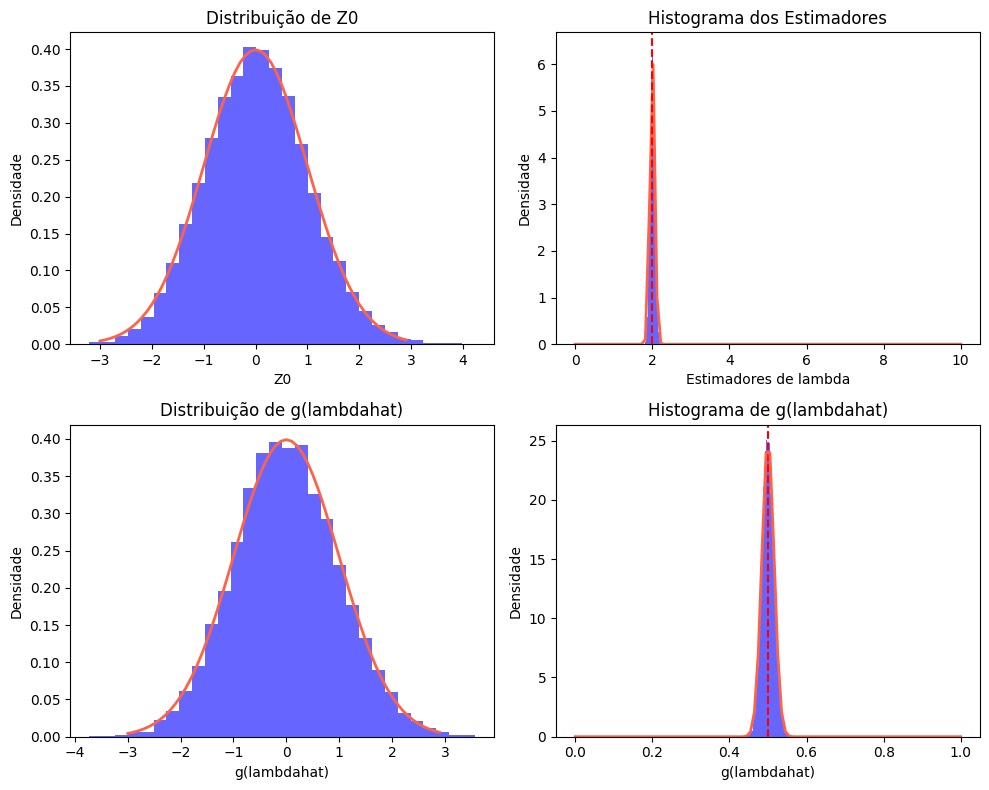

In [12]:
# Inicializando um vetor para armazenar os estimadores
lambdahat = np.zeros(N)

# Loop para gerar amostras e calcular estimadores
for j in range(N):
    # Gerar uma amostra aleatória da distribuição exponencial com parâmetro lambda0
    z = np.random.exponential(1/lambda0, n)

    # Definindo a função Un de estimação não viesada
    def Un(lambda_):
        return (1/n) * np.sum(z) - 1/lambda_

    # Encontrando o estimador de máxima verossimilhança usando root_scalar
    result = root_scalar(Un, bracket=[1e-5, 10])  # Encontrar raiz de Un
    lambdahat[j] = result.root  # Armazenar o estimador

# Definindo a função Lambda
def Lambda(lambda_):
    return 1/lambda_**2  # Expectativa para a exponencial

# Definindo a função I
def I(lambda_):
    return 1/lambda_**2

# Definindo a função V
def V(lambda_):
    return Lambda(lambda_) / I(lambda_)**2

# Cálculo do Z0
Z0 = np.sqrt(n) * (lambdahat - lambda0) / np.sqrt(V(lambda0))

# Criando os subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotando o histograma de Z0
axs[0, 0].hist(Z0, bins=30, density=True, alpha=0.6, color='b')
axs[0, 0].plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
axs[0, 0].set_title('Distribuição de Z0')
axs[0, 0].set_xlabel('Z0')
axs[0, 0].set_ylabel('Densidade')

# Plotando o histograma dos estimadores
axs[0, 1].hist(lambdahat, bins=30, density=True, alpha=0.6, color='b')
f = lambda x: norm.pdf(x, lambda0, np.sqrt(V(lambda0)/n))
x = np.linspace(0, 10, 100)
axs[0, 1].plot(x, f(x), color='tomato', lw=2)
axs[0, 1].axvline(lambda0, color='red', linestyle='--')
axs[0, 1].set_title('Histograma dos Estimadores')
axs[0, 1].set_xlabel('Estimadores de lambda')
axs[0, 1].set_ylabel('Densidade')

# Definindo a função g para g(lambda) = 1/lambda
def g(lambda_):
    return 1/lambda_

# Derivada de g
def g1(lambda_):
    return -1/lambda_**2

# Definindo V1 usando V
def V1(lambda_):
    return V(lambda_) * g1(lambda_)**2

# Cálculo do novo Z0 para g(lambdahat)
Z0_g = np.sqrt(n) * (g(lambdahat) - g(lambda0)) / np.sqrt(V1(lambda0))

# Plotando o histograma de Z0 para g(lambdahat)
axs[1, 0].hist(Z0_g, bins=30, density=True, alpha=0.6, color='b')
axs[1, 0].plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
axs[1, 0].set_title('Distribuição de g(lambdahat)')
axs[1, 0].set_xlabel('g(lambdahat)')
axs[1, 0].set_ylabel('Densidade')

# Plotando o histograma de g(lambdahat)
axs[1, 1].hist(g(lambdahat), bins=30, density=True, alpha=0.6, color='b')
axs[1, 1].axvline(g(lambda0), color='red', linestyle='--')
f = lambda x: norm.pdf(x, g(lambda0), np.sqrt(g1(lambda0)**2 * V(lambda0) / n))
x = np.linspace(0, 1, 100)
axs[1, 1].plot(x, f(x), color='tomato', lw=2)
axs[1, 1].set_title('Histograma de g(lambdahat)')
axs[1, 1].set_xlabel('g(lambdahat)')
axs[1, 1].set_ylabel('Densidade')

# Ajustando o layout
plt.tight_layout()
plt.show()


Considere que estamos estimando o parâmetro $\theta$ de uma distribuição Exponencial usando o estimador de máxima verossimilhança $\hat{\theta}$. A variância assintótica do estimador é calculada usando a informação de Fisher $I(\theta)$ e uma função auxiliar $\Lambda(\theta)$.

1. **Função de Estimação $U_n(\theta)$**:  
   Definimos a função de estimação como:
   $$
   U_n(\theta) = \frac{1}{n} \sum_{i=1}^{n} (z_i - \theta),
   $$
   onde $z_i \sim \text{Exponencial}(\theta)$. O estimador de máxima verossimilhança $\hat{\theta}$ é a raiz de $U_n(\theta) = 0$.

2. **Função $\Lambda(\theta)$**:  
   A função $\Lambda(\theta)$ ajusta a variância assintótica do estimador e é definida, para o caso da distribuição Exponencial, como:
   $$
   \Lambda(\theta) = \frac{1}{\theta^2}.
   $$

3. **Informação de Fisher $I(\theta)$**:  
   A informação de Fisher para um parâmetro $\theta$ em uma distribuição é dada por:
   $$
   I(\theta) = -\mathbb{E} \left[ \frac{\partial^2}{\partial \theta^2} \log f(Z; \theta) \right],
   $$
   onde $f(Z; \theta)$ é a função de densidade da distribuição Exponencial. Para a Exponencial com parâmetro $\theta$, temos:
   $$
   I(\theta) = \frac{1}{\theta^2}.
   $$

4. **Variância Assintótica $V(\theta)$**:  
   A variância assintótica do estimador $\hat{\theta}$ é dada por:
   $$
   V(\theta) = \frac{\Lambda(\theta)}{I(\theta)^2} = \theta^2.
   $$

5. **Transformação $g(\theta) = e^{-\theta}$**:  
   Suponha que estamos interessados em uma transformação de $\theta$, dada por $g(\theta) = e^{-\theta}$. Para calcular a variância assintótica de $g(\hat{\theta})$, usamos a fórmula de variância para uma função de $\theta$:
   $$
   V_1(\theta) = V(\theta) \cdot \left( g'(\theta) \right)^2.
   $$
   Aqui, a derivada de $g(\theta) = e^{-\theta}$ é:
   $$
   g'(\theta) = -e^{-\theta}.
   $$
   Portanto, a variância assintótica de $g(\hat{\theta})$ é:
   $$
   V_1(\theta) = \theta^2 \cdot \left( -e^{-\theta} \right)^2 = \theta^2 \cdot e^{-2\theta}.
   $$

6. **Distribuição Assintótica**:  
   Finalmente, podemos calcular a estatística normalizada $Z_0$ para a transformação $g(\theta) = e^{-\theta}$ como:
   $$
   Z_0 = \sqrt{n} \frac{g(\hat{\theta}) - g(\theta)}{\sqrt{V_1(\theta)}}.
   $$
   Sob condições regulares, $Z_0$ tem distribuição aproximadamente normal com média zero e variância um.


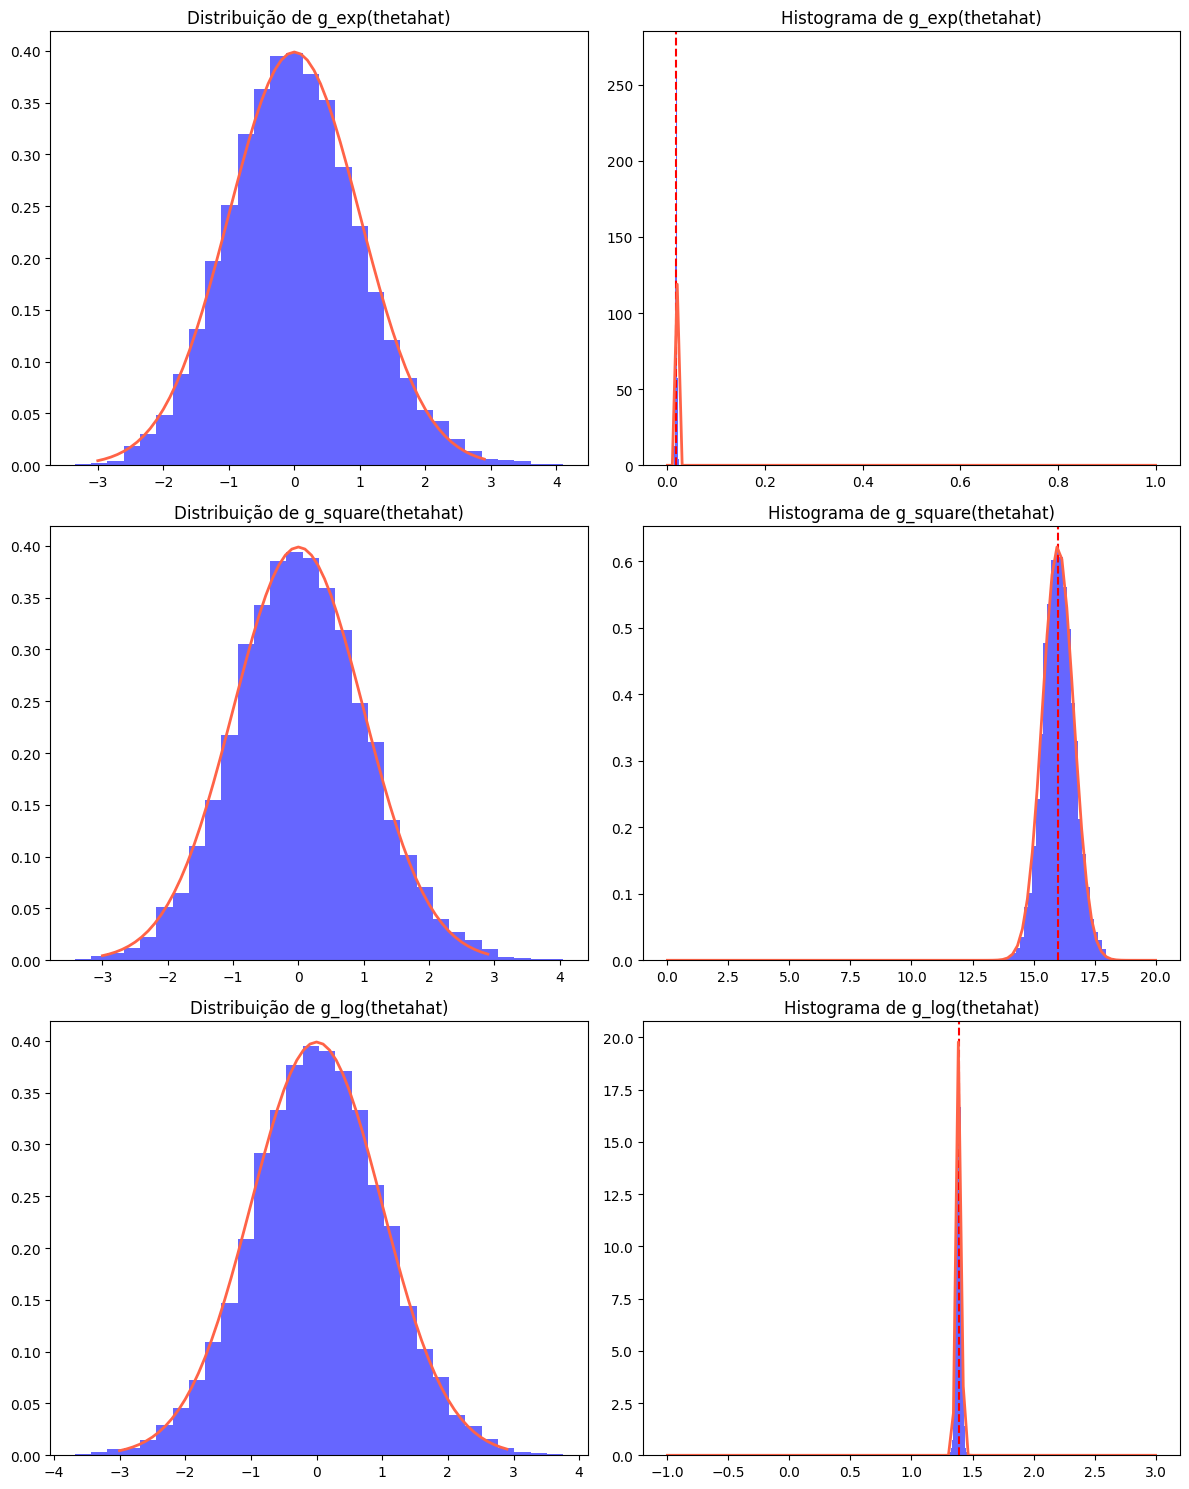

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm
from scipy.optimize import root_scalar

# Parâmetros do modelo
N = 10000  # Número de simulações
n = 1000   # Tamanho da amostra
theta0 = 4  # Valor verdadeiro de theta

# Inicializando um vetor para armazenar os estimadores
thetahat = np.zeros(N)

# Loop para gerar amostras e calcular estimadores
for j in range(N):
    # Gerar uma amostra aleatória de Poisson com parâmetro theta0
    z = np.random.poisson(theta0, n)

    # Definindo a função Un de estimação não viesada
    def Un(theta):
        return (1/n) * np.sum(1/(1 + z) - (1 - np.exp(-theta)) / theta)

    # Encontrando o estimador de máxima verossimilhança usando root_scalar
    result = root_scalar(Un, bracket=[-1, 2000])  # Encontrar raiz de Un
    thetahat[j] = result.root  # Armazenar o estimador

# Definindo a função Lambda
def Lambda(theta):
    z = np.arange(0, 10001)  # Criar um vetor de 0 a 10000
    E = np.sum(1/(1 + z)**2 * poisson.pmf(z, theta))  # Calcular a expectativa
    return E - (1 - np.exp(-theta))**2 / theta**2

# Definindo a função I
def I(theta):
    return (1 - np.exp(-theta)) / theta**2 - (np.exp(-theta)) / theta

# Definindo a função V
def V(theta):
    return Lambda(theta) / I(theta)**2

# Função g1: g(theta) = e^{-\theta}
def g_exp(theta):
    return np.exp(-theta)

# Função g2: g(theta) = \theta^2
def g_square(theta):
    return theta**2

# Função g3: g(theta) = \log(\theta)
def g_log(theta):
    return np.log(theta)

# Derivadas das funções g
def g1_exp(theta):
    return -np.exp(-theta)

def g1_square(theta):
    return 2 * theta

def g1_log(theta):
    return 1/theta

# Função V1 para g_exp
def V1_exp(theta):
    return V(theta) * g1_exp(theta)**2

# Função V1 para g_square
def V1_square(theta):
    return V(theta) * g1_square(theta)**2

# Função V1 para g_log
def V1_log(theta):
    return V(theta) * g1_log(theta)**2

# Cálculo do Z0 para g_exp(thetahat)
Z0_exp = np.sqrt(n) * (g_exp(thetahat) - g_exp(theta0)) / np.sqrt(V1_exp(theta0))

# Cálculo do Z0 para g_square(thetahat)
Z0_square = np.sqrt(n) * (g_square(thetahat) - g_square(theta0)) / np.sqrt(V1_square(theta0))

# Cálculo do Z0 para g_log(thetahat)
Z0_log = np.sqrt(n) * (g_log(thetahat) - g_log(theta0)) / np.sqrt(V1_log(theta0))

# Criando os gráficos
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Gráfico 1: Distribuição de g_exp(thetahat)
axs[0, 0].hist(Z0_exp, bins=30, density=True, alpha=0.6, color='b')
axs[0, 0].plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
axs[0, 0].set_title('Distribuição de g_exp(thetahat)')

# Gráfico 2: Histograma de g_exp(thetahat)
axs[0, 1].hist(g_exp(thetahat), bins=30, density=True, alpha=0.6, color='b')
axs[0, 1].axvline(g_exp(theta0), color='red', linestyle='--')
f_exp = lambda x: norm.pdf(x, g_exp(theta0), np.sqrt(g1_exp(theta0)**2 * V(theta0) / n))
x_exp = np.linspace(0, 1, 100)
axs[0, 1].plot(x_exp, f_exp(x_exp), color='tomato', lw=2)
axs[0, 1].set_title('Histograma de g_exp(thetahat)')

# Gráfico 3: Distribuição de g_square(thetahat)
axs[1, 0].hist(Z0_square, bins=30, density=True, alpha=0.6, color='b')
axs[1, 0].plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
axs[1, 0].set_title('Distribuição de g_square(thetahat)')

# Gráfico 4: Histograma de g_square(thetahat)
axs[1, 1].hist(g_square(thetahat), bins=30, density=True, alpha=0.6, color='b')
axs[1, 1].axvline(g_square(theta0), color='red', linestyle='--')
f_square = lambda x: norm.pdf(x, g_square(theta0), np.sqrt(g1_square(theta0)**2 * V(theta0) / n))
x_square = np.linspace(0, 20, 100)
axs[1, 1].plot(x_square, f_square(x_square), color='tomato', lw=2)
axs[1, 1].set_title('Histograma de g_square(thetahat)')

# Gráfico 5: Distribuição de g_log(thetahat)
axs[2, 0].hist(Z0_log, bins=30, density=True, alpha=0.6, color='b')
axs[2, 0].plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
axs[2, 0].set_title('Distribuição de g_log(thetahat)')

# Gráfico 6: Histograma de g_log(thetahat)
axs[2, 1].hist(g_log(thetahat), bins=30, density=True, alpha=0.6, color='b')
axs[2, 1].axvline(g_log(theta0), color='red', linestyle='--')
f_log = lambda x: norm.pdf(x, g_log(theta0), np.sqrt(g1_log(theta0)**2 * V(theta0) / n))
x_log = np.linspace(-1, 3, 100)
axs[2, 1].plot(x_log, f_log(x_log), color='tomato', lw=2)
axs[2, 1].set_title('Histograma de g_log(thetahat)')

# Ajustando o layout
plt.tight_layout()
plt.show()


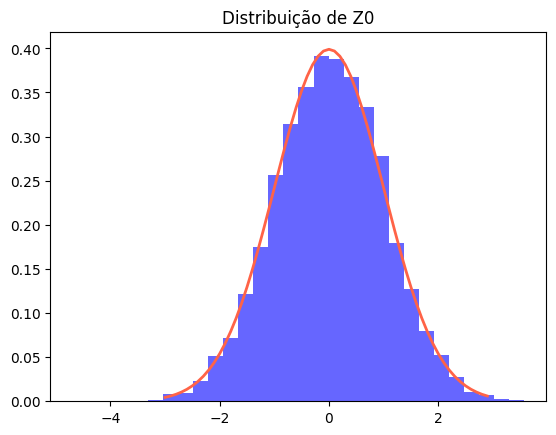

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm
from scipy.special import gamma, digamma
from scipy.optimize import root_scalar

# Parâmetros do modelo
N = 10000  # Número de simulações
n = 1000   # Tamanho da amostra
theta0 = 4  # Valor verdadeiro de theta

# Inicializando um vetor para armazenar os estimadores
thetahat = np.zeros(N)

# Loop para gerar amostras e calcular estimadores
for j in range(N):
    # Gerar uma amostra aleatória de Poisson com parâmetro theta0
    z = np.random.poisson(theta0, n)

    # Definindo a função Un de estimação não viesada
    def Un(theta):
        return (1/n) * np.sum(1/(1 + z) - (1 - np.exp(-theta)) / theta)

    # Encontrando o estimador de máxima verossimilhança usando root_scalar
    result = root_scalar(Un, bracket=[-1, 2000])  # Encontrar raiz de Un
    thetahat[j] = result.root  # Armazenar o estimador

# Definindo a função Lambda
def Lambda(theta):
    z = np.arange(0, 10001)  # Criar um vetor de 0 a 10000
    E = np.sum(1/(1 + z)**2 * poisson.pmf(z, theta))  # Calcular a expectativa
    return E - (1 - np.exp(-theta))**2 / theta**2

# Definindo a função I
def I(theta):
    return (1 - np.exp(-theta)) / theta**2 - (np.exp(-theta)) / theta

# Definindo a função V
def V(theta):
    return Lambda(theta) / I(theta)**2

# Cálculo do Z0
Z0 = np.sqrt(n) * (thetahat - theta0) / np.sqrt(V(theta0))

# Plotando o histograma de Z0
plt.hist(Z0, bins=30, density=True, alpha=0.6, color='b')
plt.plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
plt.title('Distribuição de Z0')
plt.show()

# Plotando o histograma dos estimadores
plt.hist(thetahat, bins=30, density=True, alpha=0.6, color='b')
f = lambda x: norm.pdf(x, theta0, np.sqrt(V(theta0)/n))
x = np.linspace(0, 10, 100)
plt.plot(x, f(x), color='tomato', lw=2)
plt.axvline(theta0, color='red', linestyle='--')
plt.title('Histograma dos Estimadores')
plt.show()

# Definindo a função g para g(theta) = P_theta(Z = 2) = exp(-theta)* theta^2 / 2
def g(theta):
    return np.exp(-theta) * theta**2 / 2

# Derivada de g
def g1(theta):
    return -np.exp(-theta) * theta**2 / 2 + np.exp(-theta) * theta

# Definindo V1 usando V
def V1(theta):
    return V(theta) * g1(theta)**2

# Cálculo do novo Z0 para g(thetahat)
Z0 = np.sqrt(n) * (g(thetahat) - g(theta0)) / np.sqrt(V1(theta0))

# Plotando o histograma de Z0
plt.hist(Z0, bins=30, density=True, alpha=0.6, color='b')
plt.plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
plt.title('Distribuição de g(thetahat)')
plt.show()

# Plotando o histograma de g(thetahat)
plt.hist(g(thetahat), bins=30, density=True, alpha=0.6, color='b')
plt.axvline(g(theta0), color='red', linestyle='--')
f = lambda x: norm.pdf(x, g(theta0), np.sqrt(g1(theta0)**2 * V(theta0) / n))
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), color='tomato', lw=2)
plt.title('Histograma de g(thetahat)')
plt.show()

# Definindo g(theta) = ln(theta)
def g_log(theta):
    return np.log(theta)

# Derivada de g_log
def g1_log(theta):
    return 1/theta

# Cálculo de V1 para o log
def V1_log(theta):
    return V(theta) * g1_log(theta)**2

# Cálculo do novo Z0 para g_log(thetahat)
Z0 = np.sqrt(n) * (g_log(thetahat) - g_log(theta0)) / np.sqrt(V1_log(theta0))

# Plotando o histograma de Z0 para log
plt.hist(Z0, bins=30, density=True, alpha=0.6, color='b')
plt.plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
plt.title('Distribuição de g_log(thetahat)')
plt.show()

# Plotando o histograma de g_log(thetahat)
plt.hist(g_log(thetahat), bins=30, density=True, alpha=0.6, color='b')
plt.axvline(g_log(theta0), color='red', linestyle='--')
f = lambda x: norm.pdf(x, g_log(theta0), np.sqrt(g1_log(theta0)**2 * V(theta0) / n))
x = np.linspace(-1, 3, 100)
plt.plot(x, f(x), color='tomato', lw=2)
plt.title('Histograma de g_log(thetahat)')
plt.show()

# Definindo g(theta) = log(gamma(theta))
def g_gamma(theta):
    return np.log(gamma(theta))  # Usando scipy.special.gamma para arrays

# Derivada de g_gamma
def g1_gamma(theta):
    return digamma(theta)  # Usando a função digamma para a derivada

# Cálculo de V1 para g_gamma
def V1_gamma(theta):
    return V(theta) * g1_gamma(theta)**2

# Cálculo do novo Z0 para g_gamma(thetahat)
Z0 = np.sqrt(n) * (g_gamma(thetahat) - g_gamma(theta0)) / np.sqrt(V1_gamma(theta0))

# Plotando o histograma de Z0 para g_gamma
plt.hist(Z0, bins=30, density=True, alpha=0.6, color='b')
plt.plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), color='tomato', lw=2)
plt.title('Distribuição de g_gamma(thetahat)')
plt.show()

# Plotando o histograma de g_gamma(thetahat)
plt.hist(g_gamma(thetahat), bins=30, density=True, alpha=0.6, color='b')
plt.axvline(g_gamma(theta0), color='red', linestyle='--')
f = lambda x: norm.pdf(x, g_gamma(theta0), np.sqrt(g1_gamma(theta0)**2 * V(theta0) / n))
x = np.linspace(0, 5, 100)
plt.plot(x, f(x), color='tomato', lw=2)
plt.title('Histograma de g_gamma(thetahat)')
plt.show()
